In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
x = boston.data
y = boston.target

In [3]:
import pandas as pd
df = pd.DataFrame(x)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
import numpy as np
u = np.mean(x, axis = 0)
std = np.std(x,axis = 0)

In [5]:
x = (x-u)/std

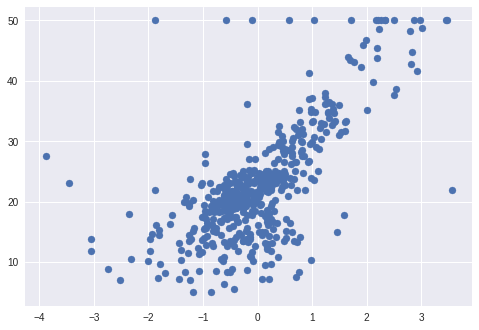

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.scatter(x[:,5],y)
plt.show()

In [9]:
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))
x.shape

(506, 14)

In [11]:
x[:5,:5]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 , -0.27259857],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101, -0.27259857],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101, -0.27259857],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771, -0.27259857],
       [ 1.        , -0.41248185, -0.48772236, -1.30687771, -0.27259857]])

In [16]:
def hypothesis(x,theta):
  y_ = 0.0
  n = x.shape[0]
  for i in range(n):
    y_ += (theta[i]*x[i])
  return y_

def error(x,y,theta):
  e = 0.0
  m = x.shape[0]
  for i in range(m):
    y_ = hypothesis(x[i],theta)
    e += (y[i]-y_)**2
  return e/m

def gradient(x,y,theta):
  m,n = x.shape
  grad = np.zeros((n,))
  for j in range(n):
    for i in range(m):
      y_ = hypothesis(x[i],theta)
      grad[j] += (y_-y[i])*x[i][j]
  return grad/m

def gradient_descent(x,y,learning_rate=0.1,epochs=300):
  m,n = x.shape
  theta = np.zeros((n,))
  error_list = []
  for i in range(epochs):
    e = error(x,y,theta)
    error_list.append(e)
    grad = gradient(x,y,theta)
    for j in range(n):
      theta[j] = theta[j] - learning_rate*grad[j]
  return theta,error_list

In [19]:
import time
start = time.time()
theta, error_list = gradient_descent(x,y)
end = time.time()
print(end-start)

18.85694122314453


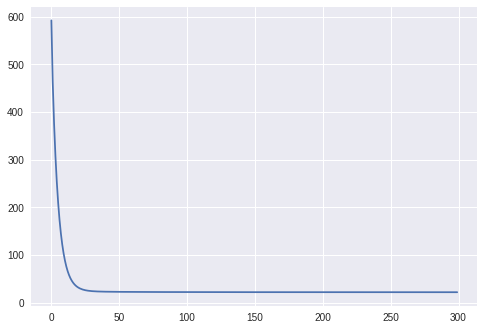

In [20]:
plt.plot(error_list)
plt.show()

In [23]:
y_ = []
for i in range(x.shape[0]):
  pred = hypothesis(x[i],theta)
  y_.append(pred)
y_ = np.array(y_)

In [25]:
def r2_score(y,y_):
  num = np.sum((y-y_)**2)
  denom = np.sum((y-y.mean())**2)
  score = 1 - num/denom
  return score*100

In [26]:
r2_score(y,y_)

74.04541323942743

In [30]:
def hypothesis(x,theta):
  return np.dot(x,theta)

def error(x,y,theta):
  error = 0.0
  n = x.shape[0]
  y_ = hypothesis(x,theta)
  error = np.sum((y-y_)**2)
  return error/n

def gradient(x,y,theta):
  y_ = hypothesis(x,theta)
  grad = np.dot(x.T,(y_ - y))
  m = x.shape[0]
  return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
  n = x.shape[1]
  theta = np.zeros((n,))
  error_list = []
  for i in range(max_iters):
    e = error(x,y,theta)
    error_list.append(e)
    grad = gradient(x,y,theta)
    theta = theta - learning_rate*grad
  return theta,error_list

In [31]:
start = time.time()
theta,error_list = gradient_descent(x,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.01857280731201172
